## The Battle of the Neighbourhoods W1


The notebook will deal with helping a client to select the best location to open his new italian restaurant in Frankfurt.
In the analysis will be fundamental to discover the neighbourhoods with the highest amount of population in relation to the number of restaurants present in the area.




The data needed will be:

1. List of Neighbourhoods of Frankfurt (w/ latitude and longitude, available at https://en.wikipedia.org/wiki/Category:Districts_of_Frankfurt)
2. List and amount of Restaurants in every neighbourough by category
3. Consider neighbourhoods with highest population, less restaurants and lower rent prices for location selection (best trade-off)


After having scratched the data from the wiki page through BeautifulSoup, latitude and longitude will be extracted thanks to a geolocator object; therefore a map will be showed to locate all the neighbourhoods in the city.

Analzying prices, population and presence of competitors, the best trade-off (and therefore best neighbourhood for the new restaurant) will be found

Population per Neighbourhood: https://www.von-poll.com/de/marktberichte/frankfurt-am-main

Prices: https://www.handelsblatt.com/finanzen/immobilien/ratgeber-hintergrund/special-trendviertel/alle-viertel-im-ueberblick-die-besten-lagen-von-frankfurt/4198904.html?ticket=ST-2475518-4TPe3hClSGjKBSy0BC22-ap3

In [1]:
import numpy as np
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
from geopy.geocoders import ArcGIS

import geocoder

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
from folium.plugins import MarkerCluster


print('Libraries imported.')

Libraries imported.


In [2]:
url_wiki = "https://en.wikipedia.org/wiki/Category:Districts_of_Frankfurt"

page = requests.get(url_wiki)

soup = BeautifulSoup(page.content, 'html.parser')


In [3]:
soup.title.string

'Category:Districts of Frankfurt - Wikipedia'

In [4]:
frankfurt_table = soup.find_all("div", class_="navbox")

In [5]:
links = frankfurt_table[0].find_all("a")[5:-1]
links

[<a href="/wiki/Altstadt_(Frankfurt_am_Main)" title="Altstadt (Frankfurt am Main)">Altstadt</a>,
 <a href="/wiki/Bahnhofsviertel" title="Bahnhofsviertel">Bahnhofsviertel</a>,
 <a href="/wiki/Bergen-Enkheim" title="Bergen-Enkheim">Bergen-Enkheim</a>,
 <a href="/wiki/Berkersheim" title="Berkersheim">Berkersheim</a>,
 <a href="/wiki/Bockenheim_(Frankfurt_am_Main)" title="Bockenheim (Frankfurt am Main)">Bockenheim</a>,
 <a href="/wiki/Bonames" title="Bonames">Bonames</a>,
 <a href="/wiki/Bornheim_(Frankfurt_am_Main)" title="Bornheim (Frankfurt am Main)">Bornheim</a>,
 <a href="/wiki/Dornbusch_(Frankfurt_am_Main)" title="Dornbusch (Frankfurt am Main)">Dornbusch</a>,
 <a href="/wiki/Eckenheim" title="Eckenheim">Eckenheim</a>,
 <a href="/wiki/Eschersheim" title="Eschersheim">Eschersheim</a>,
 <a href="/wiki/Fechenheim" title="Fechenheim">Fechenheim</a>,
 <a class="mw-redirect" href="/wiki/Flughafen_(Frankfurt_am_Main)" title="Flughafen (Frankfurt am Main)">Flughafen</a>,
 <a href="/wiki/Frank

In [6]:
def getTitles(links):
    
    neigh_list = []
    
    for link in links:
        title = link.getText()
        neigh_list.append(title)
        
    return neigh_list

In [7]:
frankfurt_neigh = getTitles(links)
frankfurt_neigh

['Altstadt',
 'Bahnhofsviertel',
 'Bergen-Enkheim',
 'Berkersheim',
 'Bockenheim',
 'Bonames',
 'Bornheim',
 'Dornbusch',
 'Eckenheim',
 'Eschersheim',
 'Fechenheim',
 'Flughafen',
 'Frankfurter Berg',
 'Gallus',
 'Ginnheim',
 'Griesheim',
 'Gutleutviertel',
 'Harheim',
 'Hausen',
 'Heddernheim',
 'Höchst',
 'Innenstadt',
 'Kalbach-Riedberg',
 'Nied',
 'Nieder-Erlenbach',
 'Nieder-Eschbach',
 'Niederrad',
 'Niederursel',
 'Nordend-Ost',
 'Nordend-West',
 'Oberrad',
 'Ostend',
 'Praunheim',
 'Preungesheim',
 'Riederwald',
 'Rödelheim',
 'Sachsenhausen-Nord',
 'Sachsenhausen-Süd',
 'Schwanheim',
 'Seckbach',
 'Sindlingen',
 'Sossenheim',
 'Unterliederbach',
 'Westend-Nord',
 'Westend-Süd',
 'Zeilsheim']

In [8]:
frankfurt_df = pd.DataFrame(frankfurt_neigh, columns = ["Neighbourhood"])

In [9]:
frankfurt_df.head()

,Neighbourhood
0,Altstadt
1,Bahnhofsviertel
2,Bergen-Enkheim
3,Berkersheim
4,Bockenheim


In [10]:
geolocator = ArcGIS()

for index, row in frankfurt_df.iterrows():
    neigh = frankfurt_df.loc[index, "Neighbourhood"]
    g=geocoder.arcgis('{}, Frankfurt, Germany'.format(neigh))
    frankfurt_df.at[index, "Latitude"] = g.latlng[0]
    frankfurt_df.at[index, "Longitude"] = g.latlng[1]

In [11]:
g=geocoder.arcgis('Frankfurt, Germany')
latitude = round(g.latlng[0], 2)
longitude = round(g.latlng[1], 2)

print("The city of Frankfurt am Main is located at Latitude: {}, Longitude: {}".format(latitude, longitude))

The city of Frankfurt am Main is located at Latitude: 50.11, Longitude: 8.68


In [12]:
frankfurt_df = frankfurt_df.round({"Latitude": 3, "Longitude": 3})
frankfurt_df.head()

,Neighbourhood,Latitude,Longitude
0,Altstadt,50.111,8.684
1,Bahnhofsviertel,50.108,8.670
2,Bergen-Enkheim,50.155,8.754
3,Berkersheim,50.173,8.698
4,Bockenheim,50.120,8.648


In [13]:
frankfurt_map = folium.Map(location=[latitude, longitude], zoom_start=14)

cluster = MarkerCluster().add_to(frankfurt_map)

for lat, long, neigh in zip(frankfurt_df.Latitude, frankfurt_df.Longitude, frankfurt_df.Neighbourhood):
    
    folium.Marker(
        location = [lat, long],
        icon = None,
        popup = neigh,
    ).add_to(cluster)

    
frankfurt_map

In [14]:
CLIENT_ID = "B53BNE4XAPOGU3CMODGRBHB1BRFAV2LN5PURBFP4AR3PUEBG"
CLIENT_SECRET ="1XWWPHJFNN3Q141V0AZYW3CUQBEP3CL4KS2P2IVCSRJMNUOI"
VERSION = "20210406"
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)
print("VERSION:" + VERSION)

Your credentails:
CLIENT_ID: B53BNE4XAPOGU3CMODGRBHB1BRFAV2LN5PURBFP4AR3PUEBG
CLIENT_SECRET:1XWWPHJFNN3Q141V0AZYW3CUQBEP3CL4KS2P2IVCSRJMNUOI
VERSION:20210406


In [15]:
def extract_category(row):
    try:
        category = row["categories"]
    
    except:
        category = row["venue.categories"]
        
    if len(category) == 0:
        return None
    
    else:
        return category[0]["name"]

In [16]:
def getNearbyVenues(database, radius = 500):
    
    # type your answer here
    LIMIT = 100 # limit of number of venues returned by Foursquare API
    CLIENT_ID = '4XVTHFFHVQXQN3ENLL4W1FQABOUL5WEMU2UIOPAPDPK0ZBTK' # your Foursquare ID
    CLIENT_SECRET = 'RU4ANFNHAHZBH1DD3AHEUJSYMSUWD2HEGQ4NFE4ZHYUU4LE2' # your Foursquare Secret
    VERSION = '20210304' # Foursquare API version
    radius = 500
    
    venues_list = []
    for neigh, lat, long in zip(database["Neighbourhood"], database["Latitude"], database["Longitude"]):
#         print(neigh)
        # create URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID,
            CLIENT_SECRET, 
            VERSION,
            lat, 
            long, 
            radius, 
            LIMIT)
        
        result = requests.get(url).json()
        
        venues = result["response"]["groups"][0]["items"]
        
        for v in venues:
            
            venues_list.append({"Neighbourhood Name": neigh, 
                              "Neighbourhood Latitude": lat, 
                              "Neighbourhood Longitude": long, 
                              "Venue Name": v["venue"]["name"], 
                              "Venue Latitude": v["venue"]["location"]["lat"], 
                              "Venue Longitude": v["venue"]["location"]["lng"],
                              "Venue Category": v["venue"]["categories"][0]["name"]
                             })
            
        venues_df = pd.DataFrame(venues_list)
            
    return venues_df 


In [17]:
frankfurt_venues = getNearbyVenues(frankfurt_df)

In [18]:
frankfurt_venues = frankfurt_venues.round({"Venue Latitude": 3, "Venue Longitude": 3})
frankfurt_venues["Venue Category"].unique()


array(['Market', 'Art Museum', 'Plaza', 'Scenic Lookout', 'Boutique',
       'Wine Bar', 'Café', 'Bakery', 'Chocolate Shop', 'Ice Cream Shop',
       'Seafood Restaurant', 'Vietnamese Restaurant', 'River',
       'Waterfront', 'Italian Restaurant', 'Beer Bar', 'Pastry Shop',
       'Burger Joint', 'Coffee Shop', 'Cocktail Bar', 'Beer Store',
       'Sushi Restaurant', 'Gym / Fitness Center', 'Tapas Restaurant',
       'German Restaurant', 'Farmers Market', 'Restaurant',
       'Moroccan Restaurant', 'Austrian Restaurant', 'Butcher',
       'Clothing Store', 'Fountain', 'Toy / Game Store', 'Donut Shop',
       'Food & Drink Shop', 'Pedestrian Plaza', 'Bar', "Men's Store",
       'Turkish Restaurant', 'Currywurst Joint', 'Soup Place',
       'American Restaurant', 'Board Shop', 'Shopping Mall',
       'Electronics Store', 'Indie Movie Theater', 'Cosmetics Shop',
       'Dessert Shop', 'Gourmet Shop', 'Hotel', 'Drugstore', 'Lounge',
       'History Museum', 'Chinese Restaurant', 'Japanese

In [19]:
to_watch = frankfurt_venues["Venue Category"].str.contains("Restaurant|Pub|Cream|Pastry|wurst|Pizza|Dessert|Salad|Breakfast|Taverna|Grocery|Sandwich|Fried|Fruit")


frankfurt_to_watch = frankfurt_venues.loc[to_watch, :].reset_index(drop=True)
frankfurt_to_watch.columns = frankfurt_to_watch.columns.str.replace("Neighbourhood Name", "Neighbourhood")

competitors_to_watch = frankfurt_to_watch["Venue Category"].str.contains("Italian|Dessert|Ice|Pastry|Trattoria|Sweet")
frankfurt_to_watch["is_competitor"] = 0

frankfurt_to_watch.loc[pd.Series(competitors_to_watch), "is_competitor"] = 1

frankfurt_to_watch.head()


,Neighbourhood,Neighbourhood Latitude,Neighbourhood Longitude,Venue Name,Venue Latitude,Venue Longitude,Venue Category,is_competitor
0,Altstadt,50.111,8.684,Das Eis,50.113,8.684,Ice Cream Shop,1
1,Altstadt,50.111,8.684,Fisch Franke,50.112,8.684,Seafood Restaurant,0
2,Altstadt,50.111,8.684,Góc Phố,50.114,8.682,Vietnamese Restaurant,0
3,Altstadt,50.111,8.684,Questione Di Gusto,50.112,8.682,Italian Restaurant,1
4,Altstadt,50.111,8.684,Condit,50.109,8.682,Pastry Shop,1


In [20]:
frankfurt_map = folium.Map(location=[latitude, longitude], zoom_start=14)

cluster = MarkerCluster().add_to(frankfurt_map)

for lat, long, name, pappa in zip(frankfurt_to_watch["Venue Latitude"], frankfurt_to_watch["Venue Longitude"],frankfurt_to_watch["Venue Name"], frankfurt_to_watch["Venue Category"]):
    
    folium.Marker(
        location = [lat, long],
        icon = None,
        popup = pappa,
    ).add_to(cluster)

    
frankfurt_map

In [21]:
frankfurt_map = folium.Map(location=[latitude, longitude], zoom_start=14)


for lat, long, name, venue_type, pappa in zip(frankfurt_to_watch["Venue Latitude"], frankfurt_to_watch["Venue Longitude"],frankfurt_to_watch["Venue Name"],frankfurt_to_watch["Venue Category"], frankfurt_to_watch["is_competitor"]):
    
    if pappa == 1:
        
        label = "{}, {}".format(name, venue_type)
        folium.Marker(
            location = [lat, long],
            icon = None,
            popup = label,
        
        ).add_to(frankfurt_map)

    
frankfurt_map

In [22]:
competitor_amount = frankfurt_to_watch.groupby("Neighbourhood").sum().sort_values("is_competitor", ascending=False)["is_competitor"].to_frame()
restaurants_amount = frankfurt_to_watch.groupby("Neighbourhood").count()["Venue Category"].to_frame()
# competitor_amount.columns = ["Competitors_Amount"]
amount_analysis = competitor_amount.merge(restaurants_amount, on = "Neighbourhood")
amount_analysis.columns = ["n_competitors", "n_restaurants"]
amount_analysis.head()

,n_competitors,n_restaurants
Neighbourhood,,
Bockenheim,7,37
Altstadt,5,19
Sachsenhausen-Nord,5,42
Sachsenhausen-Süd,5,42
Westend-Nord,4,20


In [23]:
frankfurt_one_hot = pd.get_dummies(frankfurt_to_watch["Venue Category"])
frankfurt_one_hot.insert(0, "Neighbourhood", frankfurt_to_watch["Neighbourhood"])

In [24]:
frankfurt_one_hot["is_competitor"] = frankfurt_to_watch["is_competitor"]

In [25]:
frankfurt_grouped = frankfurt_one_hot.groupby("Neighbourhood").mean().reset_index()
frankfurt_grouped.head()

,Neighbourhood,African Restaurant,American Restaurant,Apple Wine Pub,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,Bed & Breakfast,Breakfast Spot,Cajun / Creole Restaurant,Chinese Restaurant,Currywurst Joint,Czech Restaurant,Dessert Shop,Doner Restaurant,Eastern European Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,French Restaurant,Fried Chicken Joint,Fruit & Vegetable Store,German Restaurant,Greek Restaurant,Grocery Store,Hawaiian Restaurant,Ice Cream Shop,Indian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Kebab Restaurant,Korean Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Organic Grocery,Pastry Shop,Persian Restaurant,Peruvian Restaurant,Pizza Place,Portuguese Restaurant,Pub,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Seafood Restaurant,Spanish Restaurant,Sushi Restaurant,Tapas Restaurant,Taverna,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,is_competitor
0,Altstadt,0.000000,0.052632,0.0,0.0,0.000000,0.052632,0.0,0.000000,0.0,0.052632,0.052632,0.0,0.052632,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.052632,0.0,0.000000,0.000000,0.052632,0.000000,0.000000,0.000000,0.052632,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.052632,0.000000,0.105263,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.157895,0.000000,0.0,0.052632,0.000000,0.052632,0.052632,0.0,0.000000,0.0,0.0,0.052632,0.000000,0.052632,0.263158
1,Bahnhofsviertel,0.020408,0.000000,0.0,0.0,0.081633,0.000000,0.0,0.020408,0.0,0.061224,0.020408,0.0,0.000000,0.0,0.0,0.0,0.020408,0.0,0.020408,0.0,0.0,0.020408,0.0,0.020408,0.020408,0.020408,0.122449,0.020408,0.020408,0.000000,0.040816,0.0,0.020408,0.020408,0.000000,0.020408,0.0,0.020408,0.020408,0.000000,0.000000,0.000000,0.0,0.020408,0.000000,0.000000,0.0,0.102041,0.020408,0.0,0.061224,0.000000,0.020408,0.000000,0.0,0.020408,0.0,0.0,0.040816,0.020408,0.061224,0.020408
2,Bergen-Enkheim,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.500000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
3,Berkersheim,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
4,Bockenheim,0.027027,0.000000,0.0,0.0,0.054054,0.000000,0.0,0.027027,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.027027,0.0,0.027027,0.000000,0.000000,0.027027,0.000000,0.000000,0.189189,0.081081,0.0,0.027027,0.000000,0.027027,0.054054,0.0,0.000000,0.000000,0.027027,0.000000,0.027027,0.0,0.081081,0.027027,0.054054,0.0,0.027027,0.000000,0.0,0.027027,0.027027,0.027027,0.000000,0.0,0.054054,0.0,0.0,0.027027,0.000000,0.027027,0.189189


In [26]:
frankfurt_merged = frankfurt_df.merge(amount_analysis, on="Neighbourhood", how="left").sort_values("n_competitors", ascending=False).reset_index(drop=True)
frankfurt_merged.replace(np.nan, 0, inplace=True)
frankfurt_merged


,Neighbourhood,Latitude,Longitude,n_competitors,n_restaurants
0,Bockenheim,50.120,8.648,7.0,37.0
1,Altstadt,50.111,8.684,5.0,19.0
2,Sachsenhausen-Nord,50.104,8.690,5.0,42.0
3,Sachsenhausen-Süd,50.104,8.690,5.0,42.0
4,Westend-Nord,50.124,8.669,4.0,20.0
5,Bornheim,50.131,8.711,4.0,17.0
6,Westend-Süd,50.124,8.669,4.0,20.0
7,Flughafen,50.052,8.575,4.0,17.0
8,Nordend-Ost,50.129,8.684,4.0,14.0
9,Nordend-West,50.129,8.684,4.0,14.0


In [160]:
frankfurt_similar = pd.get_dummies(frankfurt_venues["Venue Category"])
frankfurt_similar.insert(0, "Neighbourhood", frankfurt_venues["Neighbourhood Name"])

In [289]:
frankfurt_similar_grouped = frankfurt_similar.groupby("Neighbourhood").mean().reset_index()
frankfurt_similar_grouped.head()

,Neighbourhood,Accessories Store,African Restaurant,Airport,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Apple Wine Pub,Argentinian Restaurant,Art Museum,Arts & Crafts Store,Asian Restaurant,Austrian Restaurant,Auto Workshop,Automotive Shop,Bakery,Bank,Bar,Bed & Breakfast,Beer Bar,Beer Garden,Beer Store,Bistro,Board Shop,Boarding House,Bookstore,Boutique,Breakfast Spot,Building,Burger Joint,Bus Station,Bus Stop,Butcher,Café,Cajun / Creole Restaurant,Castle,Chinese Restaurant,Chocolate Shop,Cigkofte Place,Clothing Store,Cocktail Bar,Coffee Shop,College Residence Hall,Comedy Club,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Currywurst Joint,Czech Restaurant,Dance Studio,Department Store,Dessert Shop,Discount Store,Dive Bar,Doner Restaurant,Donut Shop,Drugstore,Dry Cleaner,Duty-free Shop,Eastern European Restaurant,Electronics Store,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farm,Farmers Market,Fast Food Restaurant,Food & Drink Shop,Food Court,Food Stand,Food Truck,Forest,Fountain,French Restaurant,Fried Chicken Joint,Friterie,Fruit & Vegetable Store,Furniture / Home Store,Garden,Gas Station,Gastropub,German Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Hawaiian Restaurant,Health Food Store,History Museum,Home Service,Hookah Bar,Hostel,Hotel,Hotel Bar,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Insurance Office,Intersection,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kebab Restaurant,Korean Restaurant,Light Rail Station,Liquor Store,Lounge,Luggage Store,Malay Restaurant,Malga,Market,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Movie Theater,Museum,Music Store,Nightclub,Opera House,Organic Grocery,Other Nightlife,Other Repair Shop,Outdoor Sculpture,Outlet Store,Park,Pastry Shop,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Pet Store,Pharmacy,Photography Studio,Pizza Place,Platform,Playground,Plaza,Pool,Pool Hall,Portuguese Restaurant,Post Office,Pub,Radio Station,Ramen Restaurant,Record Shop,Rental Car Location,Restaurant,River,Rock Club,Sake Bar,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shipping Store,Shopping Mall,Shopping Plaza,Soccer Field,Soup Place,Spa,Spanish Restaurant,Speakeasy,Sports Bar,Stables,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tapas Restaurant,Taverna,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Tram Station,Trattoria/Osteria,Turkish Restaurant,Vegetarian / Vegan Restaurant,Video Store,Vietnamese Restaurant,Waterfront,Whisky Bar,Wine Bar,Wine Shop,Yoga Studio,Zoo
0,Altstadt,0.0,0.000000,0.0,0.0,0.0,0.0,0.013889,0.0,0.0,0.027778,0.000000,0.000000,0.013889,0.0,0.0,0.013889,0.000000,0.013889,0.0,0.013889,0.0,0.013889,0.000000,0.013889,0.0,0.0,0.013889,0.000000,0.0,0.013889,0.0,0.0,0.013889,0.125000,0.0,0.0,0.013889,0.013889,0.00,0.027778,0.013889,0.027778,0.0,0.00,0.0,0.0,0.00,0.013889,0.0,0.013889,0.0,0.0,0.0,0.013889,0.0,0.0,0.0,0.013889,0.013889,0.0,0.0,0.0,0.013889,0.0,0.0,0.0,0.00,0.000000,0.013889,0.0,0.013889,0.0,0.0,0.0,0.0,0.013889,0.00,0.0,0.00,0.0,0.0,0.0,0.0,0.000000,0.013889,0.0,0.013889,0.0,0.000000,0.013889,0.0,0.0,0.00,0.0,0.013889,0.0,0.0,0.00,0.013889,0.00,0.0,0.013889,0.000000,0.013889,0.0,0.0,0.00,0.00,0.013889,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.013889,0.0,0.00,0.0,0.013889,0.000000,0.013889,0.000000,0.000000,0.0,0.000000,0.00,0.000000,0.013889,0.000000,0.0,0.0,0.0,0.00,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.027778,0.013889,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.041667,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.041667,0.013889,0.0,0.0,0.00,0.0

In [290]:
k = 8

cluster_df = frankfurt_similar_grouped.drop("Neighbourhood", 1)
clz = KMeans(n_clusters = k, random_state = 0).fit(cluster_df)

In [291]:
frankfurt_similar_grouped.insert(1, "Cluster", clz.labels_)

In [292]:
frankfurt_clusters = frankfurt_similar_grouped[["Neighbourhood", "Cluster"]]
frankfurt_clusters.set_index("Neighbourhood", inplace=True)



In [293]:
frankfurt_final = frankfurt_merged.merge(frankfurt_clusters, on="Neighbourhood")
frankfurt_final

,Neighbourhood,Latitude,Longitude,n_competitors,n_restaurants,Cluster
0,Bockenheim,50.120,8.648,7.0,37.0,1
1,Altstadt,50.111,8.684,5.0,19.0,1
2,Sachsenhausen-Nord,50.104,8.690,5.0,42.0,1
3,Sachsenhausen-Süd,50.104,8.690,5.0,42.0,1
4,Westend-Nord,50.124,8.669,4.0,20.0,1
5,Bornheim,50.131,8.711,4.0,17.0,1
6,Westend-Süd,50.124,8.669,4.0,20.0,1
7,Flughafen,50.052,8.575,4.0,17.0,1
8,Nordend-Ost,50.129,8.684,4.0,14.0,1
9,Nordend-West,50.129,8.684,4.0,14.0,1


In [294]:
url_wiki = "https://de.wikipedia.org/wiki/Liste_der_Stadtteile_von_Frankfurt_am_Main"

page = requests.get(url_wiki)

soup = BeautifulSoup(page.content, 'html.parser')


In [295]:
ff_table = soup.find_all("table", class_="wikitable sortable zebra mw-collapsible")
ff_table

[<table class="wikitable sortable zebra mw-collapsible" style="text-align:right;">
 <caption>Tabelle der 46 Stadtteile mit Stand 31. Dezember 2019<sup class="reference" id="cite_ref-2"><a href="#cite_note-2">[2]</a></sup>
 </caption>
 <tbody><tr class="hintergrundfarbe5" style="vertical-align:top">
 <th>Nr.<br/></th>
 <th>Stadtteil<br/></th>
 <th>Fläche<sup class="reference" id="cite_ref-3"><a href="#cite_note-3">[3]</a></sup><br/>in km²</th>
 <th>Einwohner<br/></th>
 <th>Weiblich<br/></th>
 <th>Männlich<br/></th>
 <th>Deutsche</th>
 <th><a href="/wiki/Ausl%C3%A4nder" title="Ausländer">Ausländer</a><br/></th>
 <th>Ausländer<br/>in Prozent</th>
 <th>Einwohner<br/>je km²</th>
 <th><a href="/wiki/Liste_der_Ortsbezirke_von_Frankfurt_am_Main" title="Liste der Ortsbezirke von Frankfurt am Main">Ortsbezirk</a></th>
 <th>Stadtgebiet<br/>seit</th>
 <th>Vorherige Zugehörigkeit
 </th></tr>
 <tr>
 <td>1</td>
 <td align="left">
 <p><a href="/wiki/Frankfurt-Altstadt" title="Frankfurt-Altstadt">Altst

In [296]:
header = [th.text.rstrip() for th in ff_table[0].find_all("th")]
header

['Nr.',
 'Stadtteil',
 'Fläche[3]in km²',
 'Einwohner',
 'Weiblich',
 'Männlich',
 'Deutsche',
 'Ausländer',
 'Ausländerin Prozent',
 'Einwohnerje km²',
 'Ortsbezirk',
 'Stadtgebietseit',
 'Vorherige Zugehörigkeit']

In [297]:
ff_table[0].find_all("tr")[1].find_all("td")[3].find_all("span")[0].next_sibling.strip()

'4.218'

In [298]:
c1 = []
c2 = []
c3 = []


for row in ff_table[0].find_all("tr"):
    
    cells = row.find_all("td")
    
    if (cells):
        
        if cells[1].getText().strip() == "Flughafen":
            
            c1.append(cells[1].getText().strip())
            c2.append("0")
            c3.append("0")
        
        else:
            
            c1.append(cells[1].getText().strip())
            c2.append(cells[3].find_all("span")[0].next_sibling.strip())
            c3.append(cells[9].getText().strip())

In [299]:
ff_df = pd.DataFrame(columns=["Neighbourhood", "Inhabitants", "Inhabitants (per sqm)"])
ff_df["Neighbourhood"] = c1
ff_df["Inhabitants"] = c2
ff_df["Inhabitants (per sqm)"] = c3

ff_df.replace(".", "", inplace=True)
ff_df.drop(ff_df.tail(1).index,inplace=True) # drop last n rows

ff_df["Inhabitants"] = ff_df["Inhabitants"].astype(str).str.replace('\.','').astype(int)
ff_df["Inhabitants (per sqm)"] = ff_df["Inhabitants (per sqm)"].astype(int)


<ipython-input-299-5b50ad8fe10b>:9: FutureWarning: The default value of regex will change from True to False in a future version.
  ff_df["Inhabitants"] = ff_df["Inhabitants"].astype(str).str.replace('\.','').astype(int)


In [300]:
ff_df

,Neighbourhood,Inhabitants,Inhabitants (per sqm)
0,Altstadt,4218,8336
1,Innenstadt,6599,4426
2,Bahnhofsviertel,3552,6554
3,Westend-Süd,19314,7735
4,Westend-Nord,10373,6356
5,Nordend-West,30897,9967
6,Nordend-Ost,23182,15132
7,Ostend,29477,5298
8,Bornheim,30917,11097
9,Gutleutviertel,6964,3886


In [301]:
frankfurt_final = frankfurt_final.merge(ff_df, on = "Neighbourhood")

In [302]:
frankfurt_final

,Neighbourhood,Latitude,Longitude,n_competitors,n_restaurants,Cluster,Inhabitants,Inhabitants (per sqm)
0,Bockenheim,50.120,8.648,7.0,37.0,1,41904,5218
1,Altstadt,50.111,8.684,5.0,19.0,1,4218,8336
2,Sachsenhausen-Nord,50.104,8.690,5.0,42.0,1,32817,7749
3,Sachsenhausen-Süd,50.104,8.690,5.0,42.0,1,29151,955
4,Westend-Nord,50.124,8.669,4.0,20.0,1,10373,6356
5,Bornheim,50.131,8.711,4.0,17.0,1,30917,11097
6,Westend-Süd,50.124,8.669,4.0,20.0,1,19314,7735
7,Flughafen,50.052,8.575,4.0,17.0,1,0,0
8,Nordend-Ost,50.129,8.684,4.0,14.0,1,23182,15132
9,Nordend-West,50.129,8.684,4.0,14.0,1,30897,9967


In [303]:
frankfurt_final["% competitors"] = frankfurt_final["n_competitors"] / frankfurt_final["Inhabitants (per sqm)"]

In [304]:
frankfurt_final.drop(7, axis=0, inplace=True) # drop last n rows


In [305]:
frankfurt_final = frankfurt_final.reset_index(drop=True)

In [306]:
prices = [16.83, 28.99, 13.79, 11.69, 22.67, 26.20, 26.31, 15.82, 15.10, 14.22, 25.46, 12.39, 20.40, 14.10, 14.48, 20.28, 12.37, 17.08, 16.08, 16.09, 26.35,17.70, 14.70, 11.92, 12.62, 21.97, 13.56, 25.39, 19.33, 20.84, 24.09, 14.04, 14.48, 16.32, 24.86, 24.28, 24.28, 14.77, 14.77, 13.91, 11.70, 12.49, 17.75, 24.04, 13.48]

In [307]:
frankfurt_final = frankfurt_final.sort_values("Neighbourhood").reset_index(drop=True)
frankfurt_final["Prices per sqm"] = prices

In [317]:
frankfurt_final[frankfurt_final["Cluster"]==1].sort_values(["% competitors", "Prices per sqm"], ascending=[True, True])

,Neighbourhood,Latitude,Longitude,n_competitors,n_restaurants,Cluster,Inhabitants,Inhabitants (per sqm),% competitors,Prices per sqm
14,Griesheim,50.103,8.603,0.0,4.0,1,23825,4672,0.000000,14.48
12,Gallus,50.106,8.641,1.0,12.0,1,41851,9265,0.000108,20.40
1,Bahnhofsviertel,50.108,8.670,1.0,49.0,1,3552,6554,0.000153,28.99
30,Ostend,50.116,8.698,1.0,23.0,1,29477,5298,0.000189,24.09
9,Eschersheim,50.160,8.654,1.0,8.0,1,15344,4748,0.000211,14.22
27,Nordend-Ost,50.129,8.684,4.0,14.0,1,23182,15132,0.000264,25.39
19,Höchst,50.099,8.544,1.0,6.0,1,15897,3458,0.000289,16.09
6,Bornheim,50.131,8.711,4.0,17.0,1,30917,11097,0.000360,26.31
28,Nordend-West,50.129,8.684,4.0,14.0,1,30897,9967,0.000401,19.33
5,Bonames,50.183,8.665,2.0,4.0,1,6456,4706,0.000425,26.20


In [312]:
frankfurt_final

,Neighbourhood,Latitude,Longitude,n_competitors,n_restaurants,Cluster,Inhabitants,Inhabitants (per sqm),% competitors,Prices per sqm
0,Altstadt,50.111,8.684,5.0,19.0,1,4218,8336,0.000600,16.83
1,Bahnhofsviertel,50.108,8.670,1.0,49.0,1,3552,6554,0.000153,28.99
2,Bergen-Enkheim,50.155,8.754,0.0,2.0,3,17941,1424,0.000000,13.79
3,Berkersheim,50.173,8.698,0.0,1.0,5,3791,1190,0.000000,11.69
4,Bockenheim,50.120,8.648,7.0,37.0,1,41904,5218,0.001342,22.67
5,Bonames,50.183,8.665,2.0,4.0,1,6456,4706,0.000425,26.20
6,Bornheim,50.131,8.711,4.0,17.0,1,30917,11097,0.000360,26.31
7,Dornbusch,50.146,8.667,1.0,2.0,7,18770,7873,0.000127,15.82
8,Eckenheim,50.148,8.682,0.0,3.0,7,14392,6385,0.000000,15.10
9,Eschersheim,50.160,8.654,1.0,8.0,1,15344,4748,0.000211,14.22


In [313]:
cluster_1 = frankfurt_final[frankfurt_final["Cluster"] == 1].sort_values("% competitors", ascending=False)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

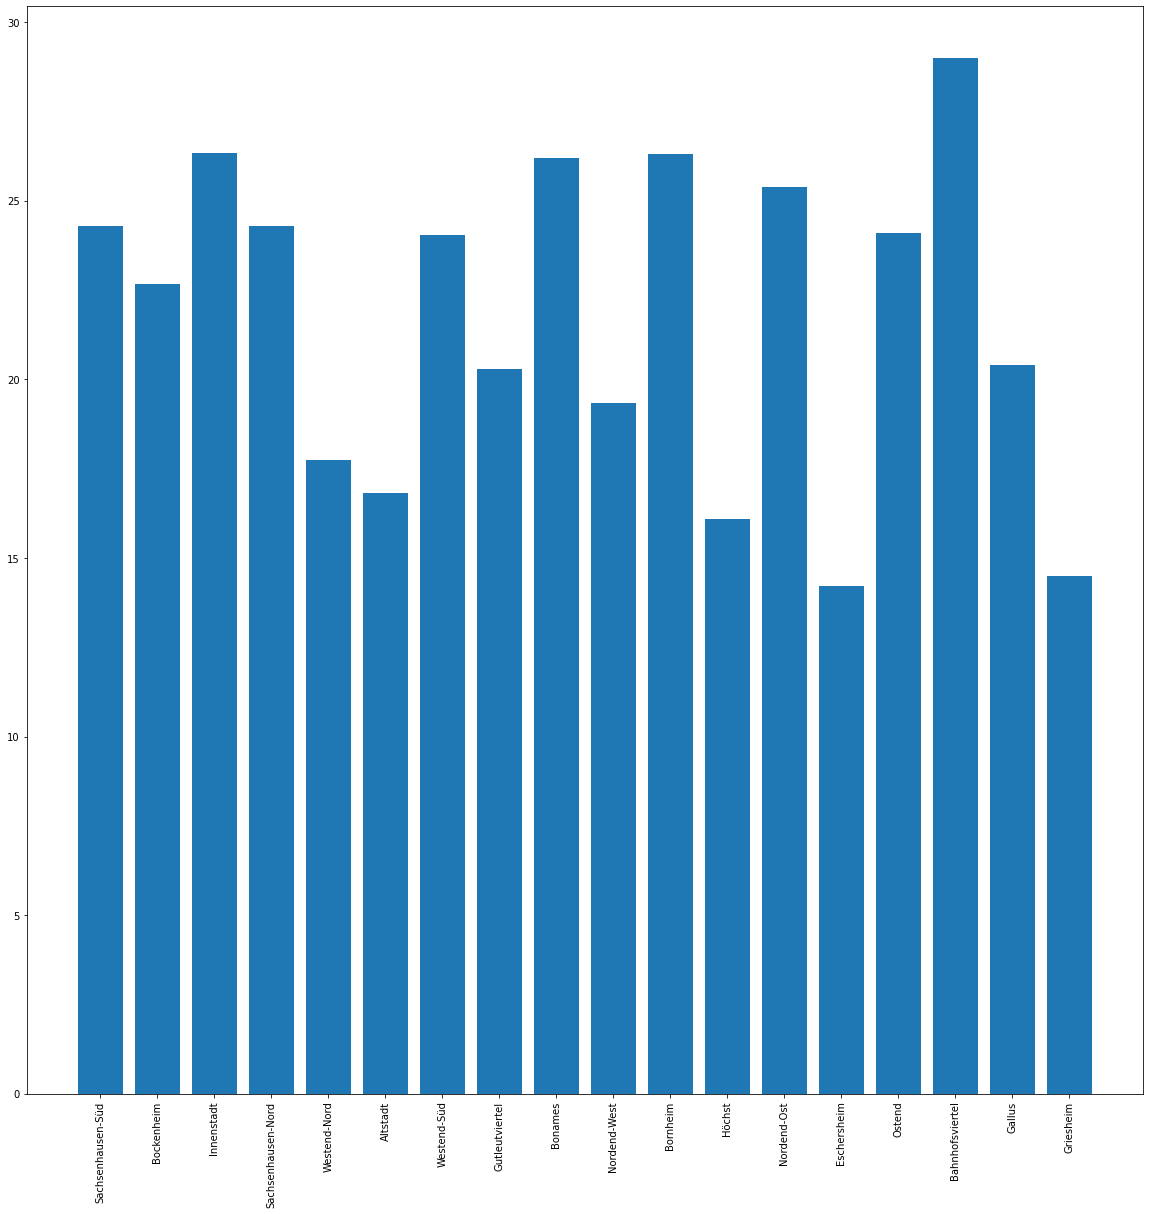

In [314]:
fig = plt.figure(figsize=(20,20))

plt.bar(cluster_1["Neighbourhood"], cluster_1["Prices per sqm"])
plt.xticks(rotation=90)


In [316]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors  

map_clusters = folium.Map(location=[latitude, longitude], zoom_start=13)



# set color scheme for the clusters
x = np.arange(k)
ys = [i + x + (i*x)**2 for i in range(k)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

markers_colors = []
for lat, lon, poi, cluster in zip(frankfurt_final['Latitude'], frankfurt_final['Longitude'], frankfurt_final['Neighbourhood'], frankfurt_final['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       

map_clusters